<a href="https://colab.research.google.com/github/daianasparta/my_work/blob/main/NLP_Toxic_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import re #regex
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
import nltk
#! pip install pattern
from pattern.es import lemma
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import os
print(os.getcwd())
print()

/content



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/train.csv")
df_test = pd.read_csv("drive/My Drive/Colab Notebooks/test.csv")
df_test_labels = pd.read_csv("drive/My Drive/Colab Notebooks/test_labels.csv")

In [ ]:
#df = pd.read_csv("train.csv")
#df_test = pd.read_csv("test.csv")
#df_test_labels = pd.read_csv("test_labels.csv")

## **Análisis Exploratorio de Datos (EDA) / Preprocesamiento**

In [5]:
print(df.shape)
print(df_test.shape)
print(df_test_labels.shape)

(159571, 8)
(153164, 2)
(153164, 7)


In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
# Elimination of tuples with all "-1" since, accordingly to the rules of competition, those were not used for scoring.
df_test_labels = df_test_labels[df_test_labels.toxic != -1]

#### Dataset shape

In [8]:
cols_target = ['toxic','severe_toxic', 'obscene','threat', 'insult','identity_hate']
#cols_target = ['toxic','severe_toxic', 'obscene','threat', 'insult','identity_hate','toxic&severe_toxic','toxic&obscene','toxic&threat','toxic&insult','toxic&identity_hate',
#               'severe_toxic&obscene','severe_toxic&threat','severe_toxic&insult','severe_toxic&identity_hate','obscene&threat','obscene&insult','obscene&identity_hate',
#               'threat&insult','threat&identity_hate','insult&identity_hate']

for target in cols_target:
  print(target)
  print(df[target].value_counts(), "\n")
  print(df[target].value_counts(normalize = True).round(decimals = 3),"\n")

toxic
0    144277
1     15294
Name: toxic, dtype: int64 

0    0.904
1    0.096
Name: toxic, dtype: float64 

severe_toxic
0    157976
1      1595
Name: severe_toxic, dtype: int64 

0    0.99
1    0.01
Name: severe_toxic, dtype: float64 

obscene
0    151122
1      8449
Name: obscene, dtype: int64 

0    0.947
1    0.053
Name: obscene, dtype: float64 

threat
0    159093
1       478
Name: threat, dtype: int64 

0    0.997
1    0.003
Name: threat, dtype: float64 

insult
0    151694
1      7877
Name: insult, dtype: int64 

0    0.951
1    0.049
Name: insult, dtype: float64 

identity_hate
0    158166
1      1405
Name: identity_hate, dtype: int64 

0    0.991
1    0.009
Name: identity_hate, dtype: float64 



In [9]:
x=df.iloc[:,2:]
rowsums=x.iloc[:,2:].sum(axis=1)
x['clean']=(rowsums==0)*1
x=x.iloc[:,0:].sum()
x['clean'].sum()
print("Total comments = ",len(df))
print("Total clean comments = ",x['clean'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total clean comments =  149053
Total tags = 184151


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


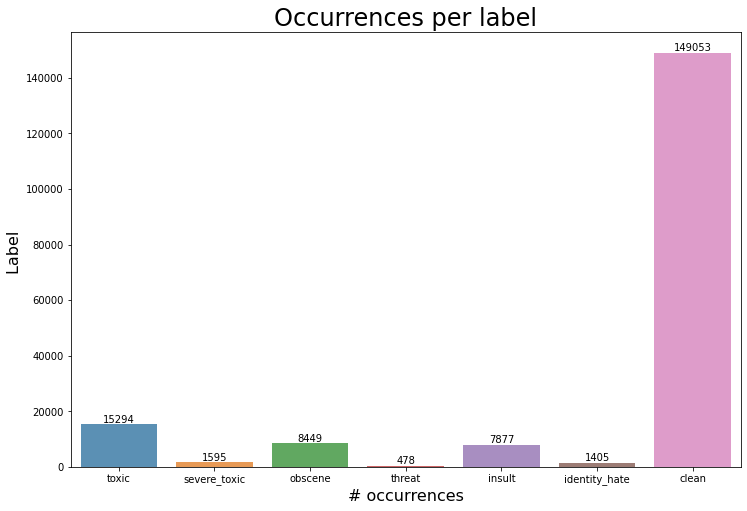

In [10]:
# Occurrences per label/target
#plot
import seaborn as sns
#plt.figure(figsize=(10,16))
plt.figure(figsize=(12,8))
ax= sns.barplot(x.index,x.values,  alpha=0.8)
plt.title("Occurrences per label", fontsize=24)
plt.ylabel('Label ', fontsize=16)
plt.xlabel('# occurrences', fontsize=16)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

#### Label Correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


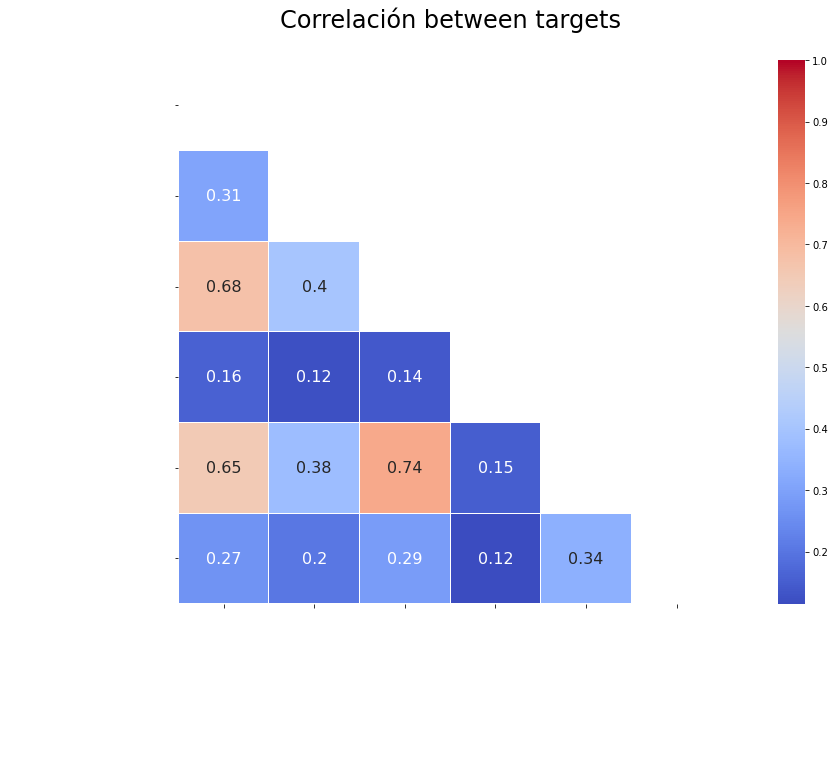

In [11]:
import seaborn as sns
import numpy as np
data_targets = df[cols_target]
corr_matrix = data_targets.astype(float).corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
colormap = plt.cm.coolwarm
plt.figure(figsize=(20,10))
plt.title('Correlación between targets',y=1.05,size=24)
heatmap = sns.heatmap(corr_matrix,mask=mask,linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True,annot_kws={"size": 16})
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 25, rotation = 90, color = "white")
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 25, rotation = 0 , color = "white")
plt.savefig('heatmap.png', bbox_inches='tight', transparent = True)

Since labels are boolean/categorical variables, pearson correlation is not appropiate. I should try some correspondence analysis. 

#### Tokenization, replacement and correction of words

In [12]:
lemmer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [13]:
def preprocess(x):
    
    #Lematize
    x = ' '.join([lemmer.lemmatize(w, 'v') for w in x.rstrip().split()])

    # Minuscule
    x = x.lower()

    # Punctuation removal
    x = re.sub(r'[^\w\s]', '', x)
    
    # Special characters removal (i.e. emojis)
    x = re.sub(r'[^\x00-\x7F\x80-\xFF\u0100-\u017F\u0180-\u024F\u1E00-\u1EFF]', '', x)

    # Stop words removal
    x = ' '.join([w for w in x.split() if w not in stop_words])    

    return x

In [14]:
df['comment_text'] = df['comment_text'].apply(preprocess) 
df_test['comment_text'] = df_test['comment_text'].apply(preprocess)

#### WordClouds

WordClouds for Clean Comments

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


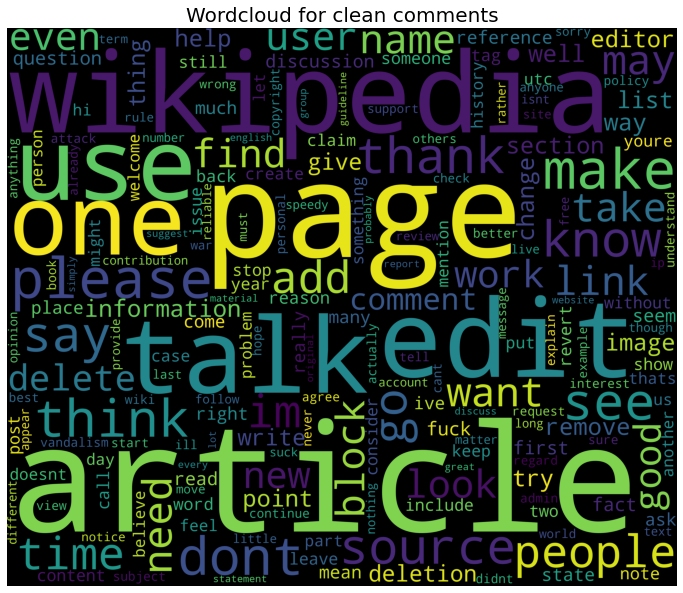

In [15]:
#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

all_comments = []
for item in df['comment_text']:
    all_comments.append(item)
commonWord = ' '.join(all_comments)

common_word_cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500,
                      collocations=False
                     ).generate(commonWord)

plt.figure(1,figsize=(12, 12))
plt.imshow(common_word_cloud)
plt.axis('off')
plt.title("Wordcloud for clean comments", fontsize=20)
plt.show()


I set as stop words the words: "article", "wikipedia", "page","edit", since they appear a lot and are not relevant to the problem:

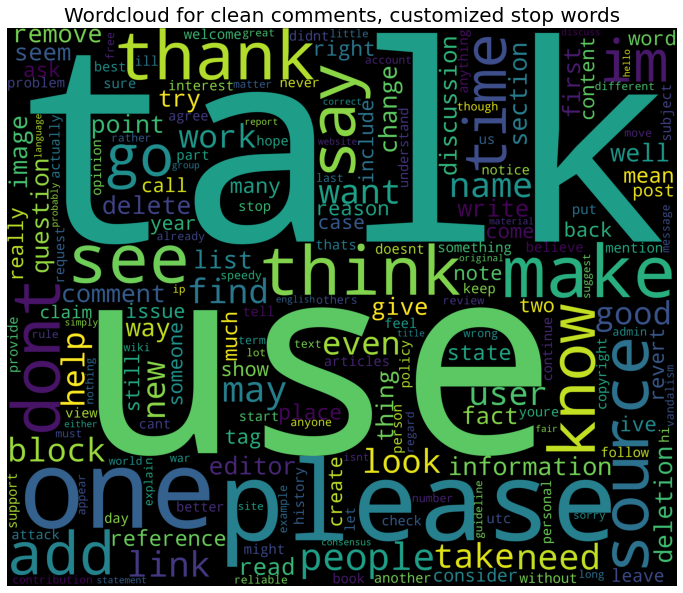

In [16]:
stop_words = ["article", "wikipedia", "page","edit"] + list(STOPWORDS)

clean_comments = []
for item in df["comment_text"][(df["toxic"] != 1) & (df["severe_toxic"] != 1) & (df["obscene"] != 1) & (df["threat"] != 1) & (df["insult"] != 1) & (df["identity_hate"] != 1)]:
    clean_comments.append(item)
toxicWord = ' '.join(clean_comments)

clean_word_cloud = WordCloud(stopwords=stop_words,
                      background_color='black',
                      width=3000,
                      height=2500,
                      collocations=False
                     ).generate(toxicWord)

plt.figure(1,figsize=(12, 12))
plt.imshow(clean_word_cloud)
plt.axis('off')
plt.title("Wordcloud for clean comments, customized stop words", fontsize=20)
plt.show()


WordCloud for Comments with some toxicity

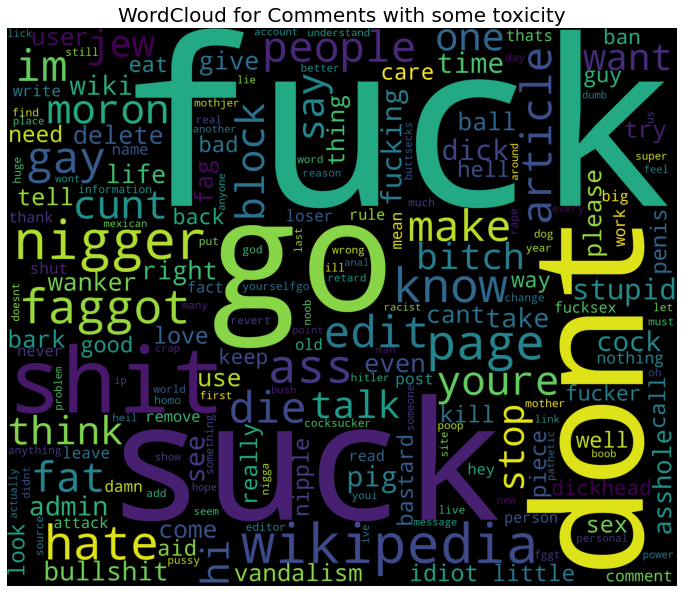

In [18]:
toxic_comments = []
for item in df["comment_text"][(df["toxic"] == 1) | (df["severe_toxic"] == 1) | (df["obscene"] == 1) | (df["threat"] == 1) | (df["insult"] == 1) | (df["identity_hate"] == 1)]:
    toxic_comments.append(item)
toxicWord = ' '.join(toxic_comments)

toxic_word_cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500,
                      collocations=False
                     ).generate(toxicWord)

plt.figure(1,figsize=(12, 12))
plt.imshow(toxic_word_cloud)
plt.axis('off')
plt.title("WordCloud for Comments with some toxicity", fontsize=20)
plt.show()


## **Tokens Vectorizer**
#### TF-IDF Vectorizer

In [19]:
train_desc = df.comment_text.values
test_desc = df_test.comment_text.values

tfv = TfidfVectorizer(min_df=2,  
                      max_features=None,
                      strip_accents='unicode', 
                      analyzer='word', 
                      #tokenizer = lambda texts: [lemma(t) for t in word_tokenize(texts)],
                      token_pattern=r'(?u)\b\w+\b',
                      ngram_range=(1, 3), 
                      use_idf=1, 
                      smooth_idf=1, 
                      sublinear_tf=1,
        )

X_tr = tfv.fit_transform(list(train_desc)) 
X_test = tfv.transform(list(test_desc))

In [20]:
X_tr

<159571x837808 sparse matrix of type '<class 'numpy.float64'>'
	with 8247437 stored elements in Compressed Sparse Row format>

## **Dimensionality Reduction**
### *Truncated singular value decomposition (SVD)*

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

In [21]:
svd = TruncatedSVD(n_components=120)
X_tr = svd.fit_transform(X_tr)
X_test = svd.transform(X_test)

In [22]:
X_tr = pd.DataFrame(X_tr, columns=['svd_{}'.format(i) for i in range(120)])
X_test = pd.DataFrame(X_test, columns=['svd_{}'.format(i) for i in range(120)])


In [23]:
# Explained variability 
print(svd.explained_variance_ratio_.sum())

0.06228066390058666


In [24]:
print(X_tr.shape)
print(X_test.shape)

(159571, 120)
(153164, 120)


## **Train & Test datasets prep**

In [25]:
X_train = pd.concat((df, X_tr), axis=1)
X_test = pd.concat((df_test.id, X_test), axis=1)
X_test = pd.merge(df_test_labels, X_test, on = "id", how = "inner")
print(X_train.shape)
print(X_test.shape)

(159571, 128)
(63978, 127)


In [26]:
X_train.drop(["id","comment_text"],axis=1,inplace=True)
X_test.drop(["id"],axis=1,inplace=True)

In [27]:
print(X_train.shape)
print(X_test.shape)

(159571, 126)
(63978, 126)


In [28]:
import numpy as np
from sklearn.metrics import hamming_loss, accuracy_score, precision_score, recall_score, f1_score,roc_curve,RocCurveDisplay

In [29]:
X_train_tfidf = X_train.drop(["toxic","severe_toxic","obscene","threat","insult","identity_hate"],axis=1)
y_train = np.asarray(X_train[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]])
print(X_train_tfidf)
print(y_train)

           svd_0     svd_1     svd_2     svd_3     svd_4     svd_5     svd_6  \
0       0.080916  0.006253 -0.007193  0.006142 -0.004981  0.001948 -0.007136   
1       0.044275 -0.008313 -0.005019 -0.008122 -0.008383 -0.007239  0.002617   
2       0.093207 -0.001752 -0.019117  0.003178 -0.010405 -0.015027 -0.008328   
3       0.081724 -0.018353 -0.018856 -0.016735 -0.004007 -0.004695  0.013212   
4       0.040348 -0.008388  0.000417  0.005020 -0.006140 -0.007684  0.002169   
...          ...       ...       ...       ...       ...       ...       ...   
159566  0.045144 -0.017373 -0.020417 -0.024132 -0.010000 -0.012394 -0.001617   
159567  0.068872 -0.010103 -0.002405  0.029991  0.000410 -0.014153 -0.001608   
159568  0.025796 -0.010017 -0.010246 -0.005385  0.000450 -0.007270  0.000266   
159569  0.065813 -0.020447  0.004438 -0.017465  0.022190 -0.012986 -0.000125   
159570  0.063814 -0.023134 -0.026832 -0.028311 -0.024144 -0.022334 -0.006519   

           svd_7     svd_8     svd_9  .

In [30]:
X_test_tfidf = X_test.drop(["toxic","severe_toxic","obscene","threat","insult","identity_hate"],axis=1)
y_test = np.asarray(X_test[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]])
print(X_test_tfidf)
print(y_test)

          svd_0     svd_1     svd_2     svd_3     svd_4     svd_5     svd_6  \
0      0.061451 -0.011362  0.019029 -0.018774 -0.005363  0.011800  0.008402   
1      0.011511 -0.003975 -0.004733 -0.006806 -0.004426 -0.001997 -0.000855   
2      0.063844 -0.021685 -0.024429 -0.028036 -0.006597 -0.005284 -0.010553   
3      0.052301 -0.012628 -0.022167 -0.022966 -0.017890 -0.005734 -0.009747   
4      0.079657 -0.021481 -0.021378 -0.016777  0.020970  0.028537  0.027727   
...         ...       ...       ...       ...       ...       ...       ...   
63973  0.090135 -0.031849 -0.025915 -0.034012 -0.019991 -0.012614  0.012238   
63974  0.004116 -0.001680 -0.002015 -0.002840 -0.001915 -0.001578 -0.000612   
63975  0.021904 -0.004847  0.009245 -0.012959 -0.003193 -0.010754 -0.000624   
63976  0.019400 -0.007567 -0.009263 -0.013798 -0.008868 -0.007017 -0.002828   
63977  0.017813 -0.005821 -0.005601 -0.003922 -0.007838  0.001023  0.006686   

          svd_7     svd_8     svd_9  ...   svd_110 

## **Multi-label kNN classifier**
#### Training

In [32]:
!pip install scikit-learn==0.24.1 # para que funcione el mlknn_classifier
!pip install scikit-multilearn
from skmultilearn.adapt import MLkNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 3.6 MB/s 


In [33]:
mlknn_classifier = MLkNN()
mlknn_classifier.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:77: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.1 (renaming of 0.26) passing these as positional arguments will result in an error
  if func is not None:


MLkNN()

#### Predicción

In [34]:
predicted_mlknn = mlknn_classifier.predict(X_test_tfidf)

In [35]:
print(predicted_mlknn.toarray())

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [1 0 1 0 1 0]
 [0 0 0 0 0 0]]


In [36]:
print("accuracy_score: ", accuracy_score(y_test, predicted_mlknn))
print("precision_score: ", precision_score(y_test, predicted_mlknn, average='weighted'))
print("recall_score: ", recall_score(y_test, predicted_mlknn, average='weighted'))
print("f1_score: ", f1_score(y_test, predicted_mlknn, average='weighted'))
print("hamming_loss: ", hamming_loss(y_test, predicted_mlknn))

accuracy_score:  0.8885710713057614
precision_score:  0.578670320005349
recall_score:  0.4644778590150366
f1_score:  0.5098692502630874
hamming_loss:  0.032594537705669654


In [37]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, predicted_mlknn)

array([[[55892,  1996],
        [ 3093,  2997]],

       [[63432,   179],
        [  314,    53]],

       [[58995,  1292],
        [ 1644,  2047]],

       [[63762,     5],
        [  208,     3]],

       [[59380,  1171],
        [ 1909,  1518]],

       [[63161,   105],
        [  596,   116]]])

## **Light GBM**
#### Training

In [38]:
import lightgbm as lgb

In [39]:
y_train_2 = X_train[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]]

In [40]:
predicted_lgbm = pd.DataFrame.from_dict({'id': df_test_labels['id']})

for target in cols_target:
  print(target)
  #d_train = lgb.Dataset(pd.concat((X_train_tfidf, y_train_2.drop(columns=target)), axis=1), label=y_train_2[target])
  d_train = lgb.Dataset(X_train_tfidf, label=y_train_2[target])

  params = {'learning_rate': 0.2,
              'application': 'binary',
              'num_leaves': 31,
              'verbosity': -1,
              'metric': 'auc',
              'data_random_seed': 2,
              'bagging_fraction': 0.8,
              'feature_fraction': 0.6,
              'nthread': 4,
              'lambda_l1': 1,
              'lambda_l2': 1,
              'convert_model': True}
    
  rounds_lookup = {'toxic': 140,
                 'severe_toxic': 50,
                 'obscene': 80,
                 'threat': 80,
                 'insult': 70,
                 'identity_hate': 80}

  model = lgb.train(params,
                      train_set=d_train,
                      num_boost_round=rounds_lookup[target],
                      #valid_sets=watchlist,
                      verbose_eval=10)
    
  predicted_lgbm[target] = model.predict(X_test_tfidf)

toxic
severe_toxic
obscene
threat
insult
identity_hate


In [41]:
predicted_lgbm_1  = predicted_lgbm.drop(["id"],axis=1)
predicted_lgbm_1[predicted_lgbm_1 >= 0.5] = 1 
predicted_lgbm_1[predicted_lgbm_1 < 0.5] = 0
predicted_lgbm_1

,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
153150,0.0,0.0,0.0,0.0,0.0,0.0
153151,1.0,0.0,1.0,0.0,1.0,0.0
153154,0.0,0.0,0.0,0.0,0.0,0.0
153155,1.0,1.0,1.0,0.0,1.0,0.0


In [42]:
multilabel_confusion_matrix(y_test, predicted_lgbm_1)


array([[[55419,  2469],
        [ 2274,  3816]],

       [[63274,   337],
        [  264,   103]],

       [[58930,  1357],
        [ 1344,  2347]],

       [[63703,    64],
        [  189,    22]],

       [[59187,  1364],
        [ 1644,  1783]],

       [[63094,   172],
        [  572,   140]]])

In [43]:
print("accuracy_score: ", accuracy_score(y_test, predicted_lgbm_1))
print("precision_score: ", precision_score(y_test, predicted_lgbm_1, average= None))
print("recall_score: ", recall_score(y_test, predicted_lgbm_1, average= None))
print("f1_score: ", f1_score(y_test, predicted_lgbm_1, average= None))
print("hamming_loss: ", hamming_loss(y_test, predicted_lgbm_1))

# CURVA ROC
#fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_lgbm)
#roc_auc = metrics.auc(fpr, tpr)
#display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
#display.plot()
#plt.show()

accuracy_score:  0.8847728906811716
precision_score:  [0.6071599  0.23409091 0.63363931 0.25581395 0.56657134 0.44871795]
recall_score:  [0.62660099 0.28065395 0.63587104 0.1042654  0.52028013 0.19662921]
f1_score:  [0.61672727 0.25526642 0.63475321 0.14814815 0.54243991 0.2734375 ]
hamming_loss:  0.031390998989235884


---

##**Bibliography:**

* Toxic Comment Classification Challenge. Kaggle. https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview
* An introduction to MultiLabel classification. https://www.geeksforgeeks.org/an-introduction-to-multilabel-classification/
* TF-IDF Vectorizer. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html